In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (80,20)
import os
from os import listdir
from os.path import isfile, join
import numpy as np
from bfseg.utils.image_enhancement import *

from os import listdir
import os
from os.path import isfile, join


In [79]:
## Main Program

cam = "rgb_1"

working_dir = "/home/rene/vicon_dataset/"+cam+"/"
output_dir = "/home/rene/vicon_dataset/rotated"

# Copy all images int this list
image_folders = [f for f in listdir(working_dir)  if ".txt" not in f]

# Sort by timestamp as they will be remapped to img_001, img_002,...
image_folders = sorted(image_folders, key=float, reverse = False)

# Projected pointcloud 
files_labels = [ f + "/labels.png" for f in image_folders]
# Projected pointcloud on top of original image
files_preview = [ f + "/preview.png" for f in image_folders]
# Distance from camera for each projected pointcloud. 
files_distance = [f + "/distance.png" for f in image_folders]
# original input image
files_original = [f + "/original.png" for f in image_folders]


In [42]:
len(files_labels)

177

In [74]:
i = 100

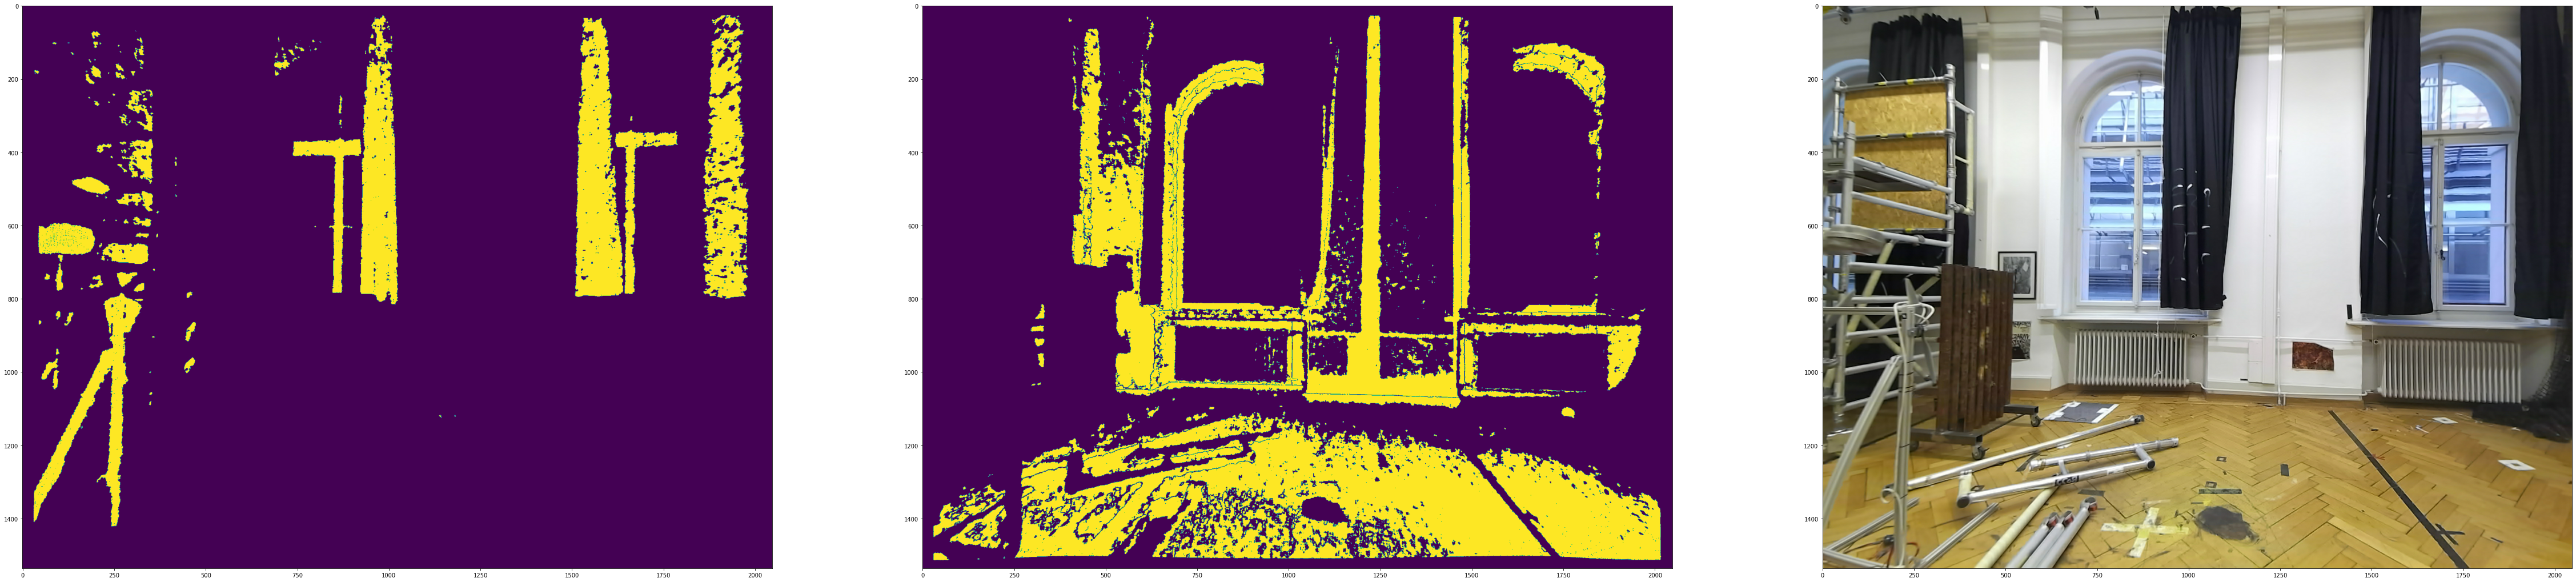

In [78]:
img = np.asarray(Image.open(working_dir + "/"+ files_labels[i]))
plt.subplot(1,3,1)
plt.imshow(np.flipud(np.fliplr(img)) > 100)
plt.subplot(1,3,2)
flp = np.flipud(np.fliplr(img))
plt.imshow(np.logical_and(flp < 40, flp > 0))

img = np.asarray(Image.open(working_dir + "/"+ files_original[i]))
plt.subplot(1,3,3)
plt.imshow(np.flipud(np.fliplr(img)))

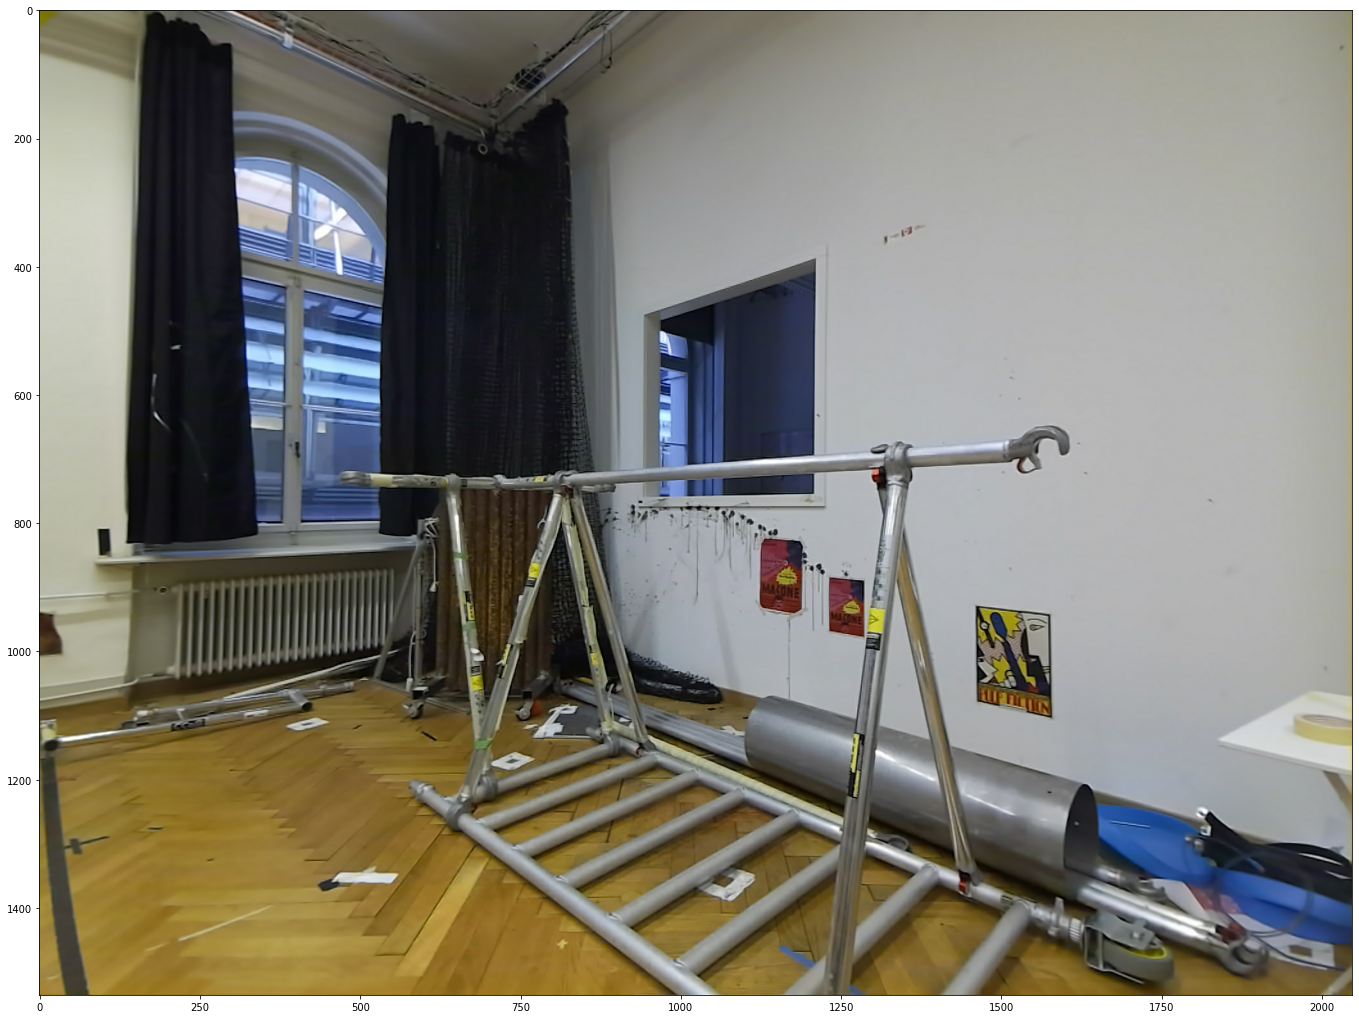

In [33]:

img = np.asarray(Image.open(working_dir + "/"+ files_original[25]))
plt.subplot(1,3,3)
plt.imshow(np.flipud(np.fliplr(img)))

In [105]:
# Extracts mapping from previous image name (timestamp) to new image name (number)
timestamp_number_mapping = ""
for j,k in enumerate(image_folders):
    timestamp_number_mapping += str(j).zfill(4)+ "," + str(k) +";\n"
    
try:
    os.mkdir(output_dir)
except OSError:
    pass
    
f = open(working_dir+ cam+"_info.txt", "w")
f.write(timestamp_number_mapping)
f.close()

# Convert labels

cnt = 1;
for i in range(len(files_labels)):
    file = files_labels[i]
    print("[", cnt , "/",len(files_labels),"]  -   " ,file, end="\r")
    cnt += 1
    try:
        os.mkdir(output_dir+"/"+ cam + "_img_"+str(i).zfill(4))
    except OSError:
        pass
    folder = output_dir+"/"+ cam + "_img_"+str(i).zfill(4)+"/"
    print(folder, name)
    # Convert labels
    
    img = np.flipud(np.fliplr(np.asarray(Image.open(working_dir + "/"+ files_original[i]))))
    depth = np.flipud(np.fliplr(np.asarray(Image.open(working_dir + "/"+ files_distance[i]))))
    labels = np.flipud(np.fliplr(np.asarray(Image.open(working_dir + "/"+ files_labels[i]))))
    labels = np.logical_and(labels < 40, labels >0 )*2 + np.logical_or(labels == 0, np.logical_and(labels > 40, labels < 100))
    name = file.replace("/labels.png", "")
    
    Image.fromarray(np.uint8(labels),'L').save(folder + cam + "_img_"+str(i).zfill(4)+ "_semseg.png")
    Image.fromarray(np.uint8(depth),'L').save(folder + cam + "_img_"+str(i).zfill(4)+ "_distance.png")
    Image.fromarray(img).save(folder + cam + "_img_"+str(i).zfill(4)+ "_img.png")
    #print(name)
    # sp = Image.open("/home/rene/lib/scalp/res/"+cam+"/"+name+"_sp.png")
    # convert_file_path_to_gt(working_dir + files_labels[i], working_dir+files_original[i], working_dir + files_distance[i], output_dir+"/"+cam+"_img_"+str(i).zfill(4)+"/", resize=True, foregroundTrustRegion=True, useSuperpixel = True,  fg_bg_threshold=70, superpixels=sp, onlyPlotResults = False)

/home/rene/vicon_dataset/rotated/rgb_1_img_0000/ 1606729464.746642
/home/rene/vicon_dataset/rotated/rgb_1_img_0001/ 1606729430.546172
/home/rene/vicon_dataset/rotated/rgb_1_img_0002/ 1606729431.146294
/home/rene/vicon_dataset/rotated/rgb_1_img_0003/ 1606729431.746365
/home/rene/vicon_dataset/rotated/rgb_1_img_0004/ 1606729432.546477
/home/rene/vicon_dataset/rotated/rgb_1_img_0005/ 1606729433.146579
/home/rene/vicon_dataset/rotated/rgb_1_img_0006/ 1606729433.746498
/home/rene/vicon_dataset/rotated/rgb_1_img_0007/ 1606729434.546550
/home/rene/vicon_dataset/rotated/rgb_1_img_0008/ 1606729435.146530
/home/rene/vicon_dataset/rotated/rgb_1_img_0009/ 1606729435.946600
/home/rene/vicon_dataset/rotated/rgb_1_img_0010/ 1606729436.546467
/home/rene/vicon_dataset/rotated/rgb_1_img_0011/ 1606729437.346446
/home/rene/vicon_dataset/rotated/rgb_1_img_0012/ 1606729438.146508
/home/rene/vicon_dataset/rotated/rgb_1_img_0013/ 1606729438.946833
/home/rene/vicon_dataset/rotated/rgb_1_img_0014/ 1606729439.74

## Plot some results

/home/rene/catkin_ws/src/background_foreground_segmentation/src/bfseg/utils/image_enhancement.py:72: RuntimeWarning: invalid value encountered in true_divide
  mean = distSum / distCounter
/home/rene/catkin_ws/src/background_foreground_segmentation/src/bfseg/utils/image_enhancement.py:73: RuntimeWarning: invalid value encountered in true_divide
  stdDev = (distSquared / distCounter) - (mean * mean)
/home/rene/catkin_ws/src/background_foreground_segmentation/src/bfseg/utils/image_enhancement.py:102: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, 3 + plt_cnt)


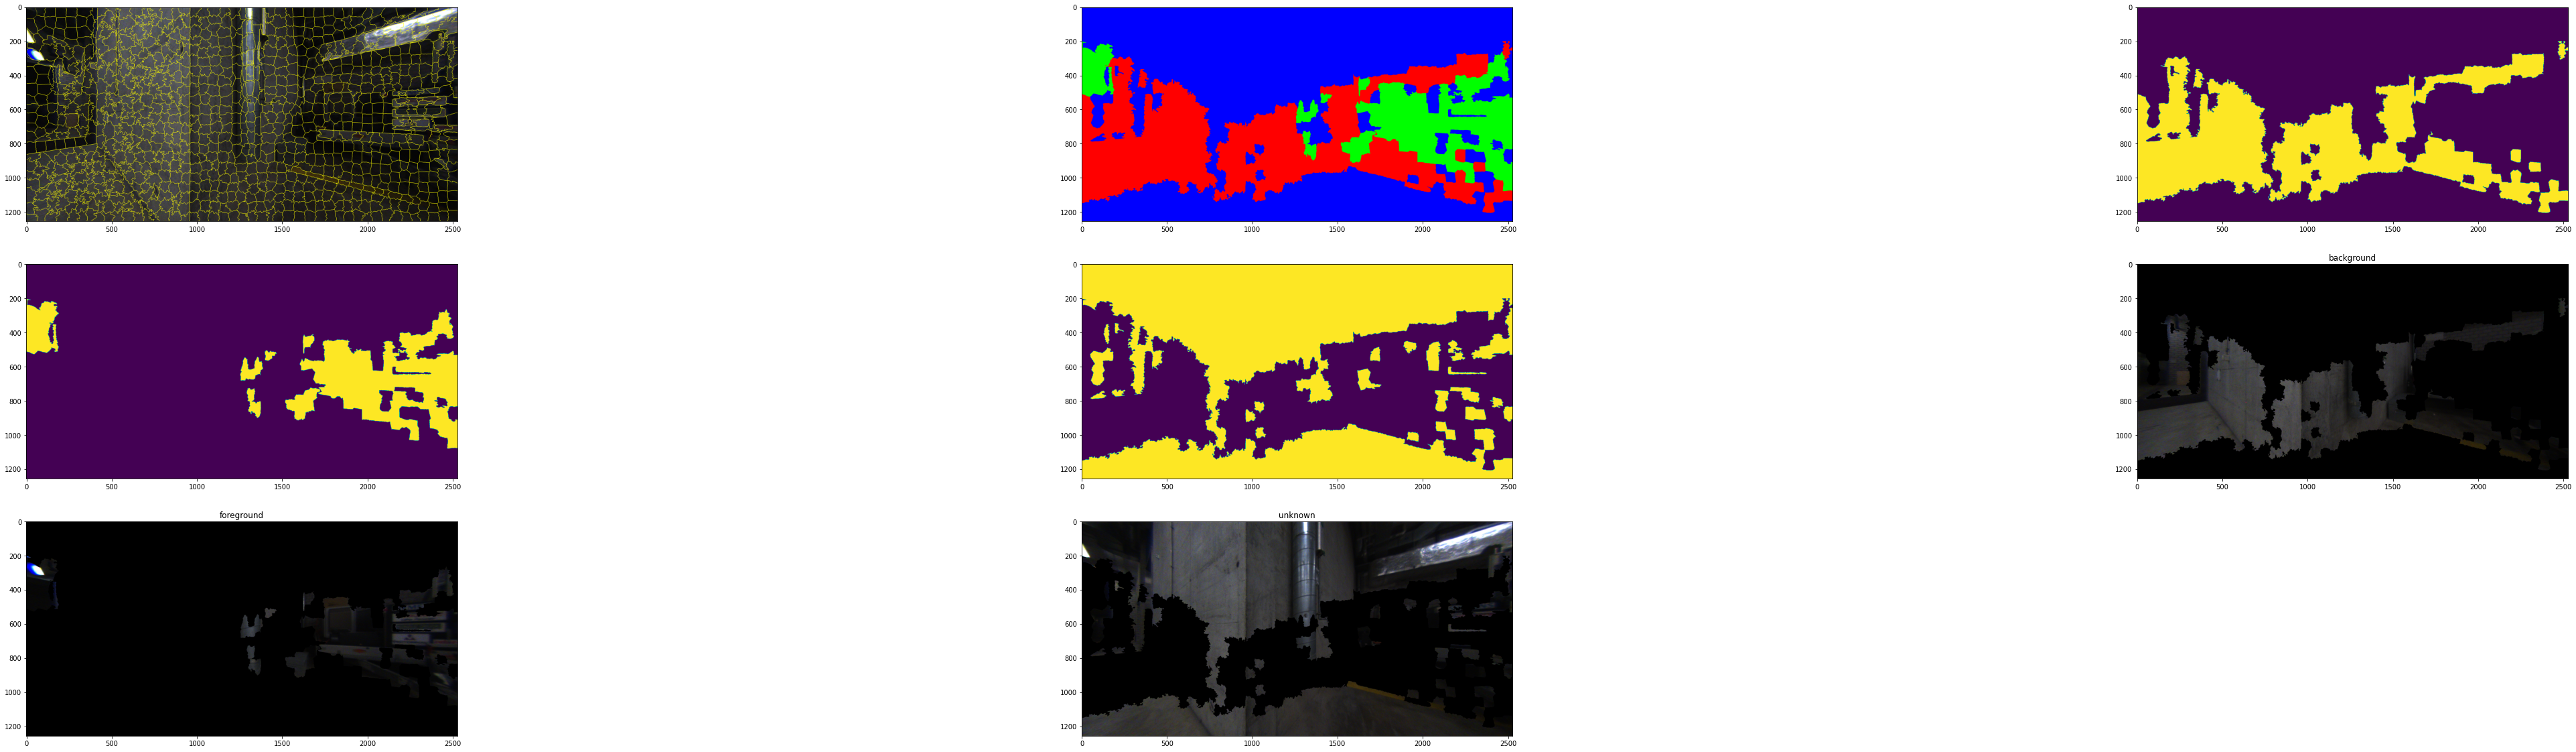

In [8]:
i = 300
file = files_labels[i]
name = file.replace("/labels.png", "")
sp = np.asarray(Image.open("/home/rene/lib/scalp/res/"+cam+"/"+name+"_sp.png")).copy()
convert_file_path_to_gt(working_dir + files_labels[i], working_dir+files_original[i], working_dir + files_distance[i], output_dir+"/img_"+str(i).zfill(4)+"/", resize=False, foregroundTrustRegion=True, useSuperpixel = True,  fg_bg_threshold=50, superpixels=sp, onlyPlotResults = True)

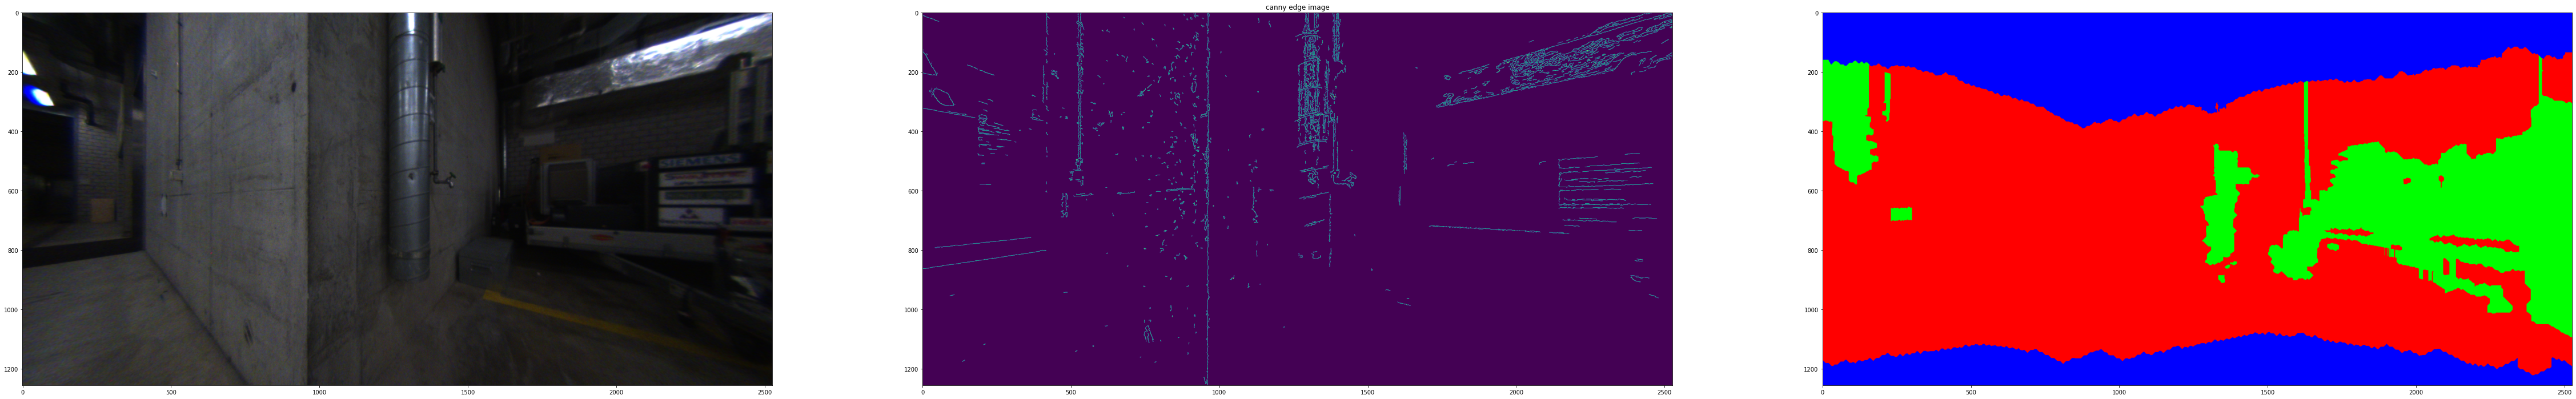

In [9]:
i = 300
file = files_labels[i]
convert_file_path_to_gt(working_dir + files_labels[i], working_dir+files_original[i], working_dir + files_distance[i], output_dir+"/img_"+str(i).zfill(4)+"/", resize=False, foregroundTrustRegion=True, useSuperpixel = False,  fg_bg_threshold=50, onlyPlotResults = True)